In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import pandas as pd


In [37]:
def scale(ms):
    return [x * 1000 for x in ms]

In [38]:
# openmp_data = {
#     "Small - Baseline": scale([1.06, 1.21, 1.21, 1.10, 1.109, 1.053, 1.07, 1.065, 1.036, 1.108, 1.204, 1.072, 1.202, 1.015, 1.027, 1.11, 1.109, 1.109, 1.108, 1.02, 1.09543, 1.07773, 1.07676, 1.05999, 1.05545, 1.04128, 1.02597, 1.0245, 1.0245, 1.0244]),
#     "Small - O2": scale([0.0571233, 0.0562961, 0.056354, 0.0562012, 0.054105, 0.0538478, 0.0537951, 0.0543752, 0.0541122, 0.053725, 0.053669, 0.053957, 0.0537679, 0.053998, 0.0540318, 0.053947, 0.053329, 0.0540302, 0.053782, 0.053602, 0.0538771, 0.053817, 0.054424, 0.054028, 0.0539629, 0.054065, 0.05513, 0.0539691, 0.053865, 0.054126]),
#     "Small - Transpose+Tiling": scale([0.0480459, 0.0437469, 0.0399439, 0.041394, 0.0408931, 0.041503, 0.0422289, 0.0412719, 0.0417311, 0.0412741, 0.041827, 0.041065, 0.040333, 0.0410609, 0.041234, 0.0419478, 0.041728, 0.0415699, 0.042016, 0.0419121, 0.0420771, 0.0423009, 0.042464, 0.0419149, 0.0419121, 0.0426321, 0.041322, 0.0423949, 0.042634, 0.0426378]),
    
#     "Medium - Baseline": scale([2.31605, 2.30631, 2.30718, 2.30727, 3.7791, 2.30721, 2.30674, 2.30943, 2.30997, 2.30993, 2.30681, 2.30454, 2.31577, 2.32183, 2.32368, 2.32355, 2.32226, 2.32318, 3.79896, 2.32251, 2.32444, 2.32559, 2.32642, 2.32796, 2.32285, 2.32027, 2.32023, 2.32088, 2.32324, 2.32262]),
#     "Medium - O2": scale([0.0970919, 0.0958259, 0.0955698, 0.098367, 0.098263, 0.098218, 0.0979791, 0.0986538, 0.099303, 0.099308, 0.098907, 0.0985651, 0.0985579, 0.098084, 0.0985861, 0.0981362, 0.0983119, 0.0981209, 0.0984371, 0.0991352, 0.0986509, 0.098635, 0.0986321, 0.0985188, 0.09865, 0.098316, 0.0984449, 0.0983999, 0.0985949, 0.0999091]),
#     "Medium - Transpose+Tiling": scale([0.084168, 0.0752079, 0.07465, 0.0746541, 0.0747151, 0.074719, 0.074883, 0.0744889, 0.0749199, 0.0746639, 0.075346, 0.0749829, 0.075104, 0.074734, 0.0759609, 0.074806, 0.0750258, 0.0750129, 0.0748649, 0.0747139, 0.0746078, 0.0747409, 0.0746932, 0.0745981, 0.0748842, 0.074748, 0.075598, 0.0750871, 0.074985]),

#     "Big - Baseline": scale([3.18395, 5.95745, 3.22901, 3.14903, 3.14379, 3.16315, 3.09378, 4.18367, 4.2485, 5.94024, 3.29509, 3.24866, 4.20876, 3.14322, 3.13339, 3.11143, 3.1407, 3.1829, 3.18494, 4.92013, 3.3107, 3.21245, 3.14133, 4.17146, 4.23819, 3.24977, 3.18158, 3.17947, 3.18046, 4.86936]),
#     "Big - O2": scale([0.133207, 0.127936, 0.130099, 0.135869, 0.134184, 0.13484, 0.135005, 0.134981, 0.135023, 0.134882, 0.134123, 0.134595, 0.133855, 0.134373, 0.134648, 0.134423, 0.134341, 0.13521, 0.136095, 0.134553, 0.133664, 0.134003, 0.134725, 0.135076, 0.135223, 0.134694, 0.136305, 0.134797, 0.134902, 0.136045]),
#     "Big - Transpose+Tiling": scale([0.108371, 0.10278, 0.101692, 0.101694, 0.101462, 0.101449, 0.104305, 0.104442, 0.104164, 0.104507, 0.10454, 0.105117, 0.104581, 0.10479, 0.104696, 0.104695, 0.10457, 0.104721, 0.104061, 0.104961, 0.104423, 0.104544, 0.104407, 0.104075, 0.104177, 0.104504, 0.104379, 0.104367, 0.104202]),
# }

# sycl_data = {
#     "Small - Baseline": scale([2.00431, 0.586253, 0.673618, 0.5867, 0.606024, 0.587659, 0.6072, 0.586695, 0.606235, 0.589295, 0.607767, 0.589836, 1.91141, 0.589002, 0.69556, 0.589607, 0.606597, 0.589834, 0.660107, 0.589154, 0.609412, 0.589209, 1.28396, 0.58923, 0.608976, 0.589048, 0.723844, 0.589859, 0.607788, 0.590343]),
#     "Small - O2": scale([ 0.0195825, 0.0179558, 0.0180072, 0.0180772, 0.0192276, 0.0182503, 0.0180525, 0.0181897, 0.0185311, 0.0185105, 0.0202173, 0.0201797, 0.0205363, 0.0204659, 0.0203345, 0.0202636, 0.0203251, 0.0197858, 0.0196816, 0.0197186, 0.0196283, 0.0184344, 0.0183067, 0.0181584, 0.0181754, 0.0180941, 0.0181592, 0.0185084, 0.0193573, 0.0195286]),
#     "Small - Transpose+Tiling": scale([0.0126837, 0.0126745, 0.0125584, 0.0129325, 0.0122437, 0.0128967, 0.0130167, 0.0127449, 0.0126711, 0.0132578, 0.0129754, 0.0127626, 0.01272, 0.0125244, 0.0132483, 0.0130902, 0.0128222, 0.0129246, 0.0128516, 0.0125206, 0.0124584, 0.0128186, 0.0126845, 0.0124135, 0.0125286, 0.012459, 0.0125152, 0.0127346, 0.0130249, 0.0128894]),

#     "Medium - Baseline": scale([1.86999, 1.94527, 1.93499, 1.87084, 1.94277, 3.24655, 1.97283, 1.91383, 1.8552, 1.94856, 1.89489, 2.00471, 1.90119, 1.89918, 1.88279, 1.87811, 1.83477, 2.04581, 1.88248, 1.93446, 1.80817, 1.94289, 1.89317, 2.05758, 1.86618, 1.92779, 1.81387, 1.94972, 1.88822, 2.0549]),
#     "Medium - O2": scale([0.0474541, 0.0457953, 0.0457688, 0.046269, 0.0421486, 0.0422568, 0.0420867, 0.0457413, 0.0456956, 0.0458727, 0.0455887, 0.0458643, 0.0426852, 0.0421703, 0.0421913, 0.0421975, 0.0396762, 0.0399496, 0.0396075, 0.039541, 0.0399338, 0.0397958, 0.0398008, 0.040089, 0.0393815, 0.0422066, 0.0428218, 0.0425334, 0.0433759, 0.0423163]),
#     "Medium - Transpose+Tiling": scale([ 0.0249888, 0.0247662, 0.0271745, 0.0277916, 0.0263132, 0.0267093, 0.0244857, 0.0264663, 0.0270565, 0.025331, 0.0248976, 0.0261011, 0.0246821, 0.026089, 0.0246156, 0.0248172, 0.0268593, 0.024644, 0.0249955, 0.0268413, 0.0263041, 0.026958, 0.0247204, 0.0256916, 0.0258167, 0.0252874, 0.0263708, 0.0247904, 0.0253259, 0.0258002]),

#     "Big - Baseline": scale([3.4942, 3.55458, 3.52599, 4.66997, 3.46266, 3.40086, 3.42877, 3.38138, 3.40761, 3.37976, 3.39452, 3.46742, 3.45971, 3.45173, 4.80442, 3.39279, 3.42708, 3.41908, 3.40949, 3.50448, 3.44932, 3.38809, 3.43538, 3.39126, 3.53944, 4.68434, 3.38824, 3.447, 3.47308, 3.44922]),
#     "Big - O2": scale([0.06551, 0.0598937, 0.0593406, 0.064417, 0.0643875, 0.0641611, 0.0592514, 0.0593026, 0.0592226, 0.0568748, 0.0560732, 0.0555696, 0.0555862, 0.0558708, 0.0555756, 0.0558131, 0.0607558, 0.0598445, 0.0598881, 0.0599997, 0.0601412, 0.0599155, 0.0593902, 0.064285, 0.0642632, 0.0640437, 0.0591893, 0.0594968, 0.0598448, 0.0641145]),
#     "Big - Transpose+Tiling": scale([0.0371023, 0.0344785, 0.0338484, 0.0361325, 0.0339252, 0.03601, 0.0347162, 0.035862, 0.0366569, 0.0373184, 0.0342156, 0.0326523, 0.0345884, 0.0355303, 0.0360824, 0.036313, 0.0349805, 0.0332751, 0.031572, 0.0323756, 0.0350242, 0.0366679, 0.0330019, 0.0332225, 0.0344732, 0.0347973, 0.0336334, 0.0365934, 0.033933]),
# }

In [39]:
openmp_data = {
    "Small - Baseline": scale([1.06, 1.21, 1.21, 1.10, 1.109, 1.053, 1.07, 1.065, 1.036, 1.108, 1.204, 1.072, 1.202, 1.015, 1.027, 1.11, 1.109, 1.109, 1.108, 1.02, 1.09543, 1.07773, 1.07676, 1.05999, 1.05545, 1.04128, 1.02597, 1.0245, 1.0245, 1.0244]),
    "Small - O2": scale([0.0571233, 0.0562961, 0.056354, 0.0562012, 0.054105, 0.0538478, 0.0537951, 0.0543752, 0.0541122, 0.053725, 0.053669, 0.053957, 0.0537679, 0.053998, 0.0540318, 0.053947, 0.053329, 0.0540302, 0.053782, 0.053602, 0.0538771, 0.053817, 0.054424, 0.054028, 0.0539629, 0.054065, 0.05513, 0.0539691, 0.053865, 0.054126]),
    "Small - Transpose+Tiling": scale([0.0480459, 0.0437469, 0.0399439, 0.041394, 0.0408931, 0.041503, 0.0422289, 0.0412719, 0.0417311, 0.0412741, 0.041827, 0.041065, 0.040333, 0.0410609, 0.041234, 0.0419478, 0.041728, 0.0415699, 0.042016, 0.0419121, 0.0420771, 0.0423009, 0.042464, 0.0419149, 0.0419121, 0.0426321, 0.041322, 0.0423949, 0.042634, 0.0426378]),
    
    "Medium - Baseline": scale([2.31605, 2.30631, 2.30718, 2.30727, 3.7791, 2.30721, 2.30674, 2.30943, 2.30997, 2.30993, 2.30681, 2.30454, 2.31577, 2.32183, 2.32368, 2.32355, 2.32226, 2.32318, 3.79896, 2.32251, 2.32444, 2.32559, 2.32642, 2.32796, 2.32285, 2.32027, 2.32023, 2.32088, 2.32324, 2.32262]),
    "Medium - O2": scale([0.0970919, 0.0958259, 0.0955698, 0.098367, 0.098263, 0.098218, 0.0979791, 0.0986538, 0.099303, 0.099308, 0.098907, 0.0985651, 0.0985579, 0.098084, 0.0985861, 0.0981362, 0.0983119, 0.0981209, 0.0984371, 0.0991352, 0.0986509, 0.098635, 0.0986321, 0.0985188, 0.09865, 0.098316, 0.0984449, 0.0983999, 0.0985949, 0.0999091]),
    "Medium - Transpose+Tiling": scale([0.084168, 0.0752079, 0.07465, 0.0746541, 0.0747151, 0.074719, 0.074883, 0.0744889, 0.0749199, 0.0746639, 0.075346, 0.0749829, 0.075104, 0.074734, 0.0759609, 0.074806, 0.0750258, 0.0750129, 0.0748649, 0.0747139, 0.0746078, 0.0747409, 0.0746932, 1.4374, 0.0745981, 0.0748842, 0.074748, 0.075598, 0.0750871, 0.074985]),

    "Big - Baseline": scale([3.18395, 5.95745, 3.22901, 3.14903, 3.14379, 3.16315, 3.09378, 4.18367, 4.2485, 5.94024, 3.29509, 3.24866, 4.20876, 3.14322, 3.13339, 3.11143, 3.1407, 3.1829, 3.18494, 4.92013, 3.3107, 3.21245, 3.14133, 4.17146, 4.23819, 3.24977, 3.18158, 3.17947, 3.18046, 4.86936]),
    "Big - O2": scale([0.133207, 0.127936, 0.130099, 0.135869, 0.134184, 0.13484, 0.135005, 0.134981, 0.135023, 0.134882, 0.134123, 0.134595, 0.133855, 0.134373, 0.134648, 0.134423, 0.134341, 0.13521, 0.136095, 0.134553, 0.133664, 0.134003, 0.134725, 0.135076, 0.135223, 0.134694, 0.136305, 0.134797, 0.134902, 0.136045]),
    "Big - Transpose+Tiling": scale([0.108371, 0.10278, 0.101692, 0.101694, 0.101462, 0.101449, 0.104305, 0.104442, 0.104164, 0.104507, 0.10454, 0.105117, 1.42191, 0.104581, 0.10479, 0.104696, 0.104695, 0.10457, 0.104721, 0.104061, 0.104961, 0.104423, 0.104544, 0.104407, 0.104075, 0.104177, 0.104504, 0.104379, 0.104367, 0.104202]),
}

sycl_data = {
    "Small - Baseline": scale([2.00431, 0.586253, 0.673618, 0.5867, 0.606024, 0.587659, 0.6072, 0.586695, 0.606235, 0.589295, 0.607767, 0.589836, 1.91141, 0.589002, 0.69556, 0.589607, 0.606597, 0.589834, 0.660107, 0.589154, 					  0.609412, 0.589209, 1.28396, 0.58923, 0.608976, 0.589048, 0.723844, 0.589859, 0.607788, 0.590343]),
    "Small - O2": scale([ 0.0195825, 0.0179558, 0.0180072, 0.0180772, 0.0192276, 0.0182503, 0.0180525, 0.0181897, 0.0185311, 0.0185105, 0.0202173, 0.0201797, 0.0205363, 0.0204659, 0.0203345, 0.0202636, 0.0203251, 0.0197858, 				      0.0196816, 0.0197186, 0.0196283, 0.0184344, 0.0183067, 0.0181584, 0.0181754, 0.0180941, 0.0181592, 0.0185084, 0.0193573, 0.0195286]),
    "Small - Transpose+Tiling": scale([0.0126837, 0.0126745, 0.0125584, 0.0129325, 0.0122437, 0.0128967, 0.0130167, 0.0127449, 0.0126711, 0.0132578, 0.0129754, 0.0127626, 0.01272, 0.0125244, 0.0132483, 0.0130902, 								 0.0128222, 0.0129246, 0.0128516, 0.0125206, 0.0124584, 0.0128186, 0.0126845, 0.0124135, 0.0125286, 0.012459, 0.0125152, 0.0127346, 0.0130249, 0.0128894]),

    "Medium - Baseline": scale([1.86999, 1.94527, 1.93499, 1.87084, 1.94277, 3.24655, 1.97283, 1.91383, 1.8552, 1.94856, 1.89489, 2.00471, 1.90119, 1.89918, 1.88279, 1.87811, 1.83477, 2.04581, 1.88248, 1.93446, 1.80817, 1.94289, 				   	  1.89317, 2.05758, 1.86618, 1.92779, 1.81387, 1.94972, 1.88822, 2.0549]),
    "Medium - O2": scale([0.0474541, 0.0457953, 0.0457688, 0.046269, 0.0421486, 0.0422568, 0.0420867, 0.0457413, 0.0456956, 0.0458727, 0.0455887, 0.0458643, 0.0426852, 0.0421703, 0.0421913, 0.0421975, 0.0396762, 0.0399496, 				      0.0396075, 0.039541, 0.0399338, 0.0397958, 0.0398008, 0.040089, 0.0393815, 0.0422066, 0.0428218, 0.0425334, 0.0433759, 0.0423163]),
    "Medium - Transpose+Tiling": scale([ 0.0249888, 0.0247662, 0.0271745, 0.0277916, 0.0263132, 0.0267093, 0.0244857, 0.0264663, 0.0270565, 0.025331, 0.0248976, 0.0261011, 0.0246821, 0.026089, 0.0246156, 0.0248172, 								 0.0268593, 0.024644, 0.0249955, 0.0268413, 0.0263041, 0.026958, 0.0247204, 0.0256916, 0.0258167, 0.0252874, 0.0263708, 0.0247904, 0.0253259, 0.0258002]),

    "Big - Baseline": scale([3.4942, 3.55458, 3.52599, 4.66997, 3.46266, 3.40086, 3.42877, 3.38138, 3.40761, 3.37976, 3.39452, 3.46742, 3.45971, 3.45173, 4.80442, 3.39279, 3.42708, 3.41908, 3.40949, 3.50448, 3.44932, 3.38809, 					  3.43538, 3.39126, 3.53944, 4.68434, 3.38824, 3.447, 3.47308, 3.44922]),
    "Big - O2": scale([0.06551, 0.0598937, 0.0593406, 0.064417, 0.0643875, 0.0641611, 0.0592514, 0.0593026, 0.0592226, 0.0568748, 0.0560732, 0.0555696, 0.0555862, 0.0558708, 0.0555756, 0.0558131, 0.0607558, 0.0598445, 				      0.0598881, 0.0599997, 0.0601412, 0.0599155, 0.0593902, 0.064285, 0.0642632, 0.0640437, 0.0591893, 0.0594968, 0.0598448, 0.0641145]),
    "Big - Transpose+Tiling": scale([0.0371023, 0.0344785, 0.0338484, 0.0361325, 0.0339252, 0.03601, 0.0347162, 0.035862, 0.0366569, 0.0373184, 0.0342156, 0.0326523, 0.0345884, 0.0355303, 0.0360824, 0.036313, 								 0.0349805, 0.0332751, 0.031572, 0.0323756, 0.0350242, 0.0366679, 0.0330019, 0.0332225, 0.0344732, 0.0347973, 0.0336334, 0.0365934, 0.033933]),
}

In [40]:
sizes = ["Small", "Medium", "Big"]

configs = ["Baseline", "O2", "Transpose+Tiling"]

Small


/tmp/ipykernel_14395/544303976.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_main = ax_main.boxplot(data, labels=labels, patch_artist=True,
/tmp/ipykernel_14395/544303976.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_zoom = ax_zoom.boxplot(zoom_data, labels=zoom_labels, patch_artist=True,


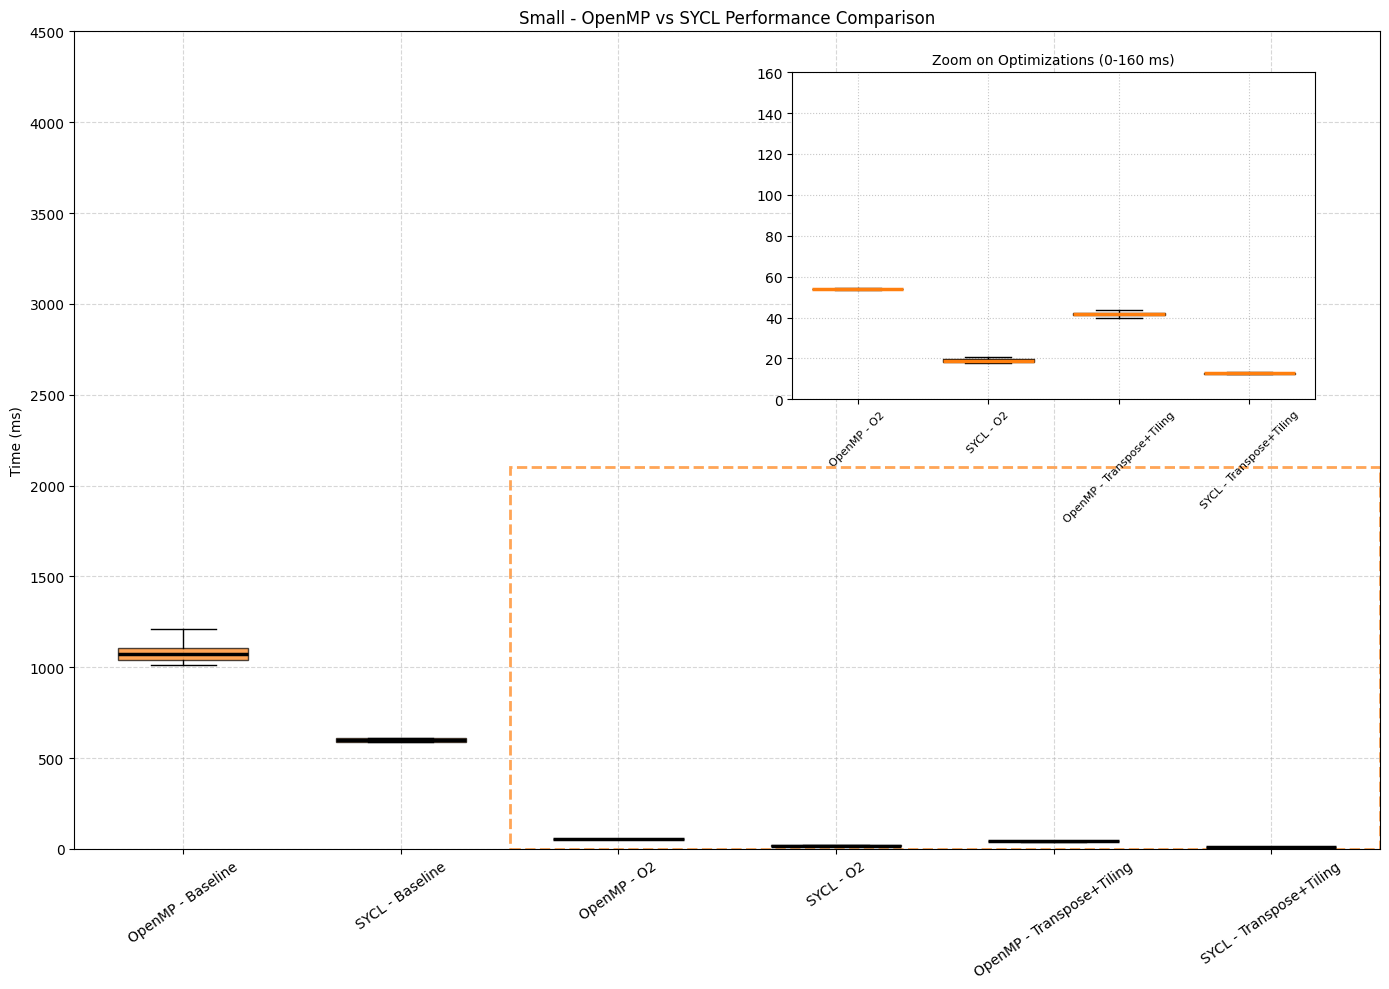

Medium


/tmp/ipykernel_14395/544303976.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_main = ax_main.boxplot(data, labels=labels, patch_artist=True,
/tmp/ipykernel_14395/544303976.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_zoom = ax_zoom.boxplot(zoom_data, labels=zoom_labels, patch_artist=True,


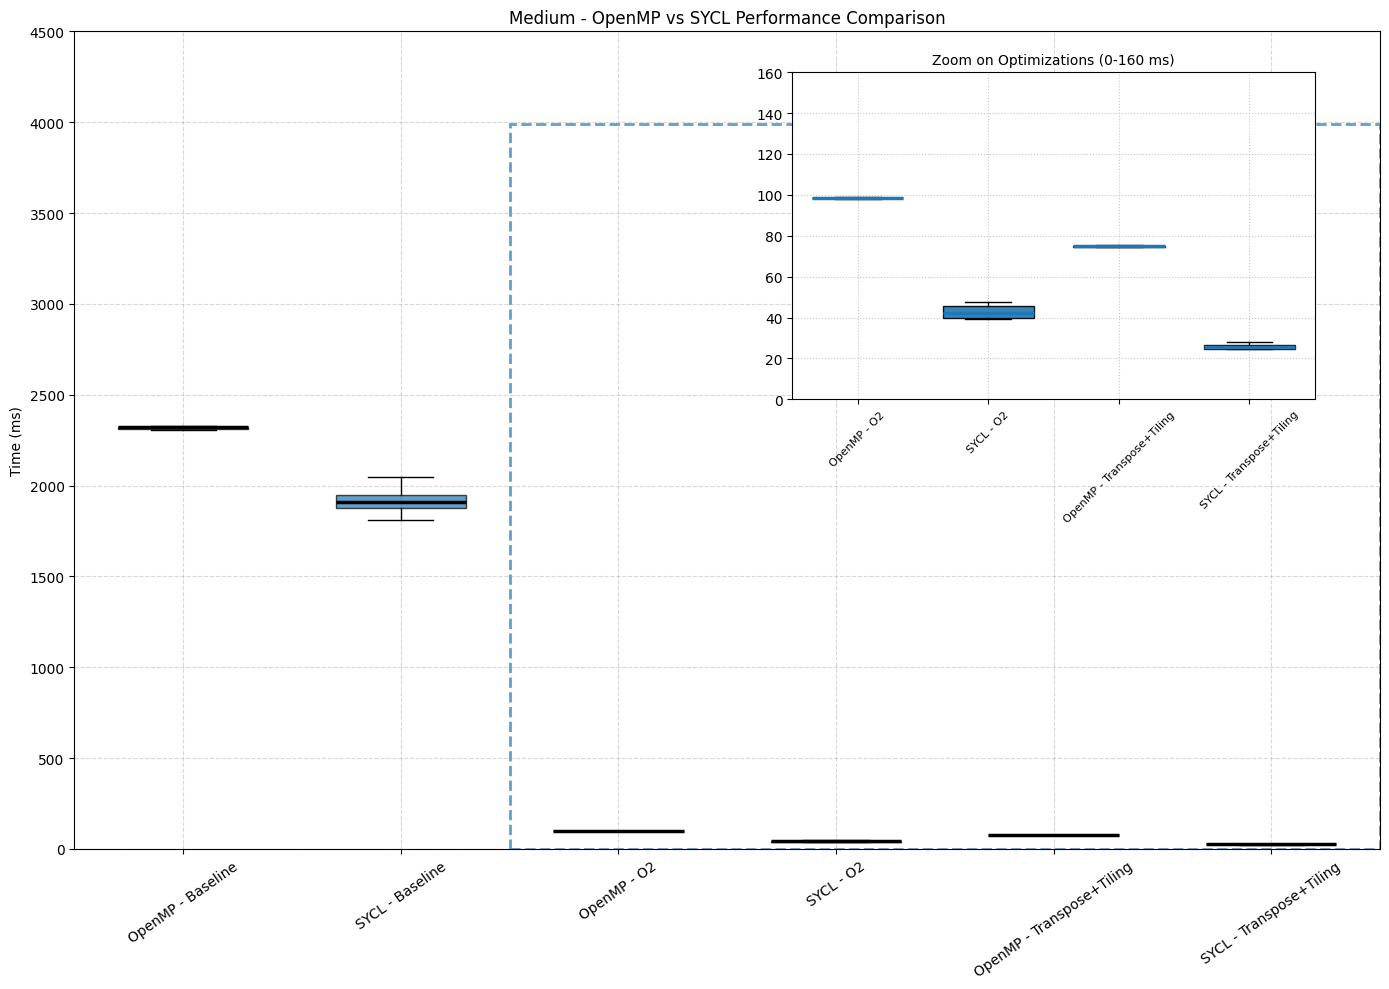

Big


/tmp/ipykernel_14395/544303976.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_main = ax_main.boxplot(data, labels=labels, patch_artist=True,
/tmp/ipykernel_14395/544303976.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_zoom = ax_zoom.boxplot(zoom_data, labels=zoom_labels, patch_artist=True,


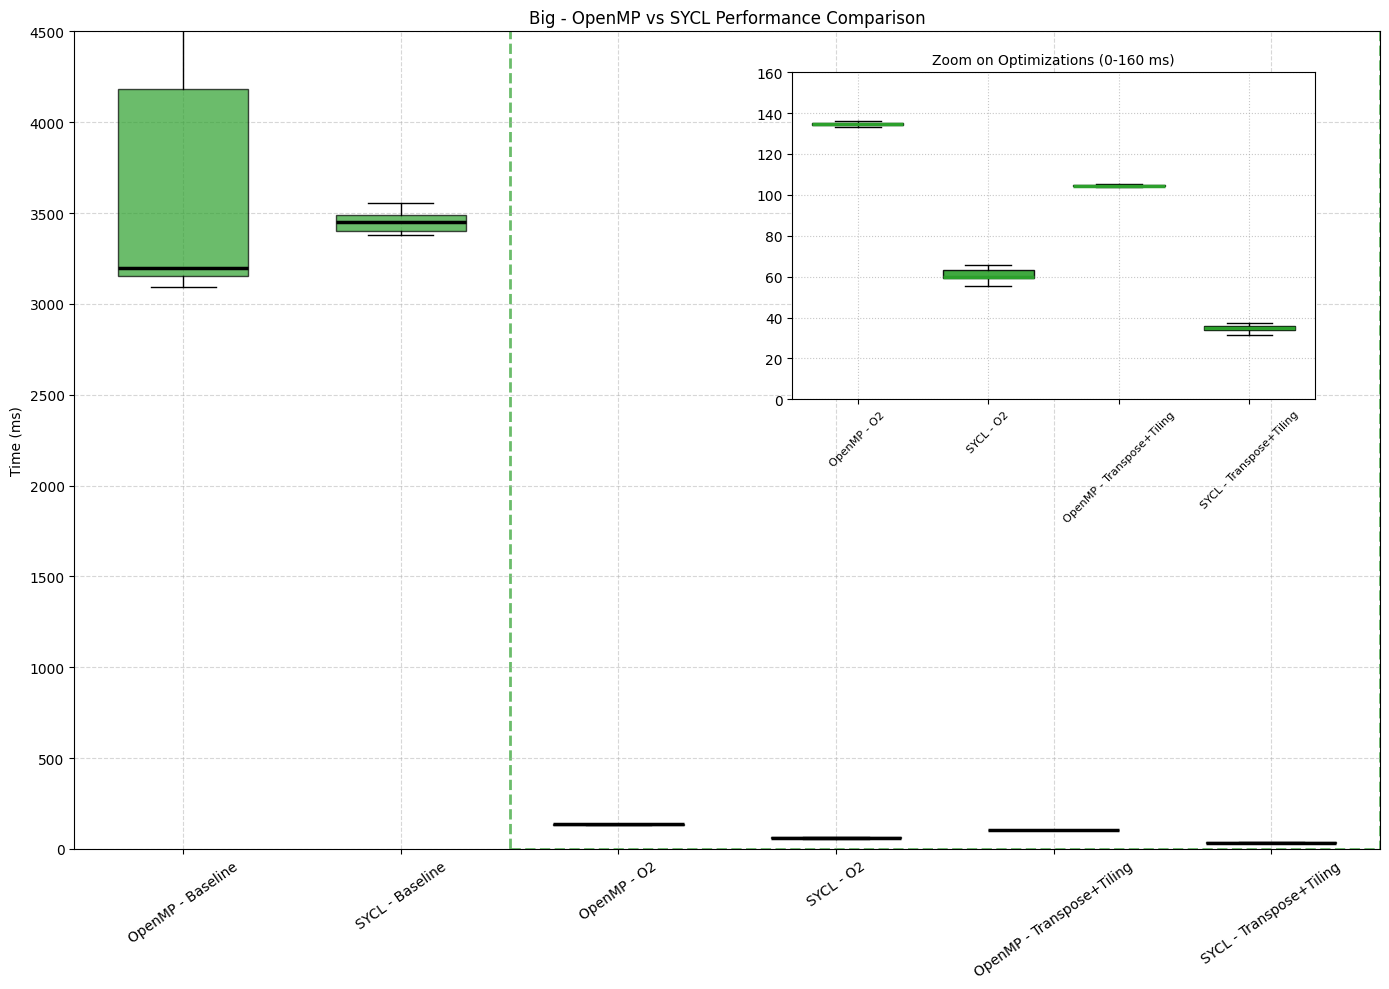

In [41]:
size_colors = {
    "Small": "#ff7f0e",
    "Medium": "#1f77b4",
    "Big": "#2ca02c",
}

for size in sizes:
    print(size)
    labels = []
    data = []
    colors = []
    
    size_color = size_colors.get(size, "gray")
    
    for config in configs:
        omp_key = f"{size} - {config}"
        sycl_key = f"{size} - {config}"
        
        labels.append(f"OpenMP - {config}")
        data.append(openmp_data[omp_key])
        colors.append(size_color)
        
        labels.append(f"SYCL - {config}")
        data.append(sycl_data[sycl_key])
        colors.append(size_color)
    
    fig, ax_main = plt.subplots(figsize=(14, 10))
    
    box_main = ax_main.boxplot(data, labels=labels, patch_artist=True, 
                              showfliers=False, widths=0.6)
    
    for patch, color in zip(box_main['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor("black")
        patch.set_alpha(0.7)
    
    for median in box_main['medians']:
        median.set_color("black")
        median.set_linewidth(2.5)
    
    ax_main.set_ylabel("Time (ms)")
    ax_main.set_title(f"{size} - OpenMP vs SYCL Performance Comparison")
    ax_main.tick_params(axis='x', rotation=35)
    ax_main.grid(True, linestyle='--', alpha=0.5)
    
    ax_zoom = ax_main.inset_axes([0.55, 0.55, 0.4, 0.4])
    
    zoom_indices = [2, 3, 4, 5]
    zoom_data = [data[i] for i in zoom_indices]
    zoom_labels = [labels[i] for i in zoom_indices]
    zoom_colors = [colors[i] for i in zoom_indices]
    
    box_zoom = ax_zoom.boxplot(zoom_data, labels=zoom_labels, patch_artist=True, 
                              showfliers=False, widths=0.7)
    
    for patch, color in zip(box_zoom['boxes'], zoom_colors):
        patch.set_facecolor(color)
        patch.set_edgecolor("black")
        patch.set_alpha(0.9)
    
    for median in box_zoom['medians']:
        median.set_color(size_color)
        median.set_linewidth(2.5)
    
    ax_zoom.set_ylim(0, 160)
    ax_zoom.set_title('Zoom on Optimizations (0-160 ms)', fontsize=10)
    ax_zoom.tick_params(axis='x', rotation=45, labelsize=8)
    ax_zoom.grid(True, linestyle=':', alpha=0.7)
    
    zoom_positions = [i+1 for i in zoom_indices]
    
    rect = Rectangle((min(zoom_positions)-0.5, 0), 
                    len(zoom_positions), 
                    max([np.max(d) for d in data]) * 1.05,
                    linewidth=2, 
                    edgecolor=size_color, 
                    facecolor='none', 
                    linestyle='--', 
                    alpha=0.7)
    ax_main.add_patch(rect)
    
    plt.ylim(0, 4500)
    plt.tight_layout()
    plt.show()


In [42]:
means_openmp = {}
for k,v in openmp_data.items():
    means_openmp[k] = np.mean(v)
    
means_sycl = {}
for k,v in sycl_data.items():
    means_sycl[k] = np.mean(v)


In [43]:
means_openmp

{'Small - Baseline': np.float64(1083.4336666666668),
 'Small - O2': np.float64(54.310430000000004),
 'Small - Transpose+Tiling': np.float64(41.96721),
 'Medium - Baseline': np.float64(2415.226),
 'Medium - O2': np.float64(98.3390833333333),
 'Medium - Transpose+Tiling': np.float64(120.63211333333335),
 'Big - Baseline': np.float64(3653.2186666666676),
 'Big - O2': np.float64(134.3892),
 'Big - Transpose+Tiling': np.float64(148.08620000000005)}

In [44]:
means_sycl

{'Small - Baseline': np.float64(721.4843999999999),
 'Small - O2': np.float64(19.07478666666667),
 'Small - Transpose+Tiling': np.float64(12.754886666666666),
 'Medium - Baseline': np.float64(1962.0570000000002),
 'Medium - O2': np.float64(42.69384666666666),
 'Medium - Transpose+Tiling': np.float64(25.756376666666668),
 'Big - Baseline': np.float64(3569.395666666667),
 'Big - O2': np.float64(60.06740333333333),
 'Big - Transpose+Tiling': np.float64(34.792496551724135)}

In [45]:
speedups_openmp = {}
speedups_sycl = {}

# OpenMP
speedups_openmp['Small Baseline vs O2'] = means_openmp['Small - Baseline'] / means_openmp['Small - O2']
speedups_openmp['Small Baseline vs Transpose+Tiling'] = means_openmp['Small - Baseline'] / means_openmp['Small - Transpose+Tiling']
speedups_openmp['Small O2 vs Transpose+Tiling'] = means_openmp['Small - O2'] / means_openmp['Small - Transpose+Tiling']

speedups_openmp['Medium Baseline vs O2'] = means_openmp['Medium - Baseline'] / means_openmp['Medium - O2']
speedups_openmp['Medium Baseline vs Transpose+Tiling'] = means_openmp['Medium - Baseline'] / means_openmp['Medium - Transpose+Tiling']
speedups_openmp['Medium O2 vs Transpose+Tiling'] = means_openmp['Medium - O2'] / means_openmp['Medium - Transpose+Tiling']

speedups_openmp['Big Baseline vs O2'] = means_openmp['Big - Baseline'] / means_openmp['Big - O2']
speedups_openmp['Big Baseline vs Transpose+Tiling'] = means_openmp['Big - Baseline'] / means_openmp['Big - Transpose+Tiling']
speedups_openmp['Big O2 vs Transpose+Tiling'] = means_openmp['Big - O2'] / means_openmp['Big - Transpose+Tiling']

# SYCL
speedups_sycl['Small Baseline vs O2'] = means_sycl['Small - Baseline'] / means_sycl['Small - O2']
speedups_sycl['Small Baseline vs Transpose+Tiling'] = means_sycl['Small - Baseline'] / means_sycl['Small - Transpose+Tiling']
speedups_sycl['Small O2 vs Transpose+Tiling'] = means_sycl['Small - O2'] / means_sycl['Small - Transpose+Tiling']

speedups_sycl['Medium Baseline vs O2'] = means_sycl['Medium - Baseline'] / means_sycl['Medium - O2']
speedups_sycl['Medium Baseline vs Transpose+Tiling'] = means_sycl['Medium - Baseline'] / means_sycl['Medium - Transpose+Tiling']
speedups_sycl['Medium O2 vs Transpose+Tiling'] = means_sycl['Medium - O2'] / means_sycl['Medium - Transpose+Tiling']

speedups_sycl['Big Baseline vs O2'] = means_sycl['Big - Baseline'] / means_sycl['Big - O2']
speedups_sycl['Big Baseline vs Transpose+Tiling'] = means_sycl['Big - Baseline'] / means_sycl['Big - Transpose+Tiling']
speedups_sycl['Big O2 vs Transpose+Tiling'] = means_sycl['Big - O2'] / means_sycl['Big - Transpose+Tiling']

print("Speedup OpenMP:")
for k, v in speedups_openmp.items():
    print(f"{k}: {v:.2f}x")
    print("-" * 50)

print("\nSpeedup SYCL:")
for k, v in speedups_sycl.items():
    print(f"{k}: {v:.2f}x")
    print("-" * 50)


Speedup OpenMP:
Small Baseline vs O2: 19.95x
--------------------------------------------------
Small Baseline vs Transpose+Tiling: 25.82x
--------------------------------------------------
Small O2 vs Transpose+Tiling: 1.29x
--------------------------------------------------
Medium Baseline vs O2: 24.56x
--------------------------------------------------
Medium Baseline vs Transpose+Tiling: 20.02x
--------------------------------------------------
Medium O2 vs Transpose+Tiling: 0.82x
--------------------------------------------------
Big Baseline vs O2: 27.18x
--------------------------------------------------
Big Baseline vs Transpose+Tiling: 24.67x
--------------------------------------------------
Big O2 vs Transpose+Tiling: 0.91x
--------------------------------------------------

Speedup SYCL:
Small Baseline vs O2: 37.82x
--------------------------------------------------
Small Baseline vs Transpose+Tiling: 56.57x
--------------------------------------------------
Small O2 vs Tra

In [46]:
df_openmp = pd.DataFrame.from_dict(speedups_openmp, orient='index', columns=['Speedup'])
df_openmp.index.name = 'Comparison'
df_openmp['Type'] = 'OpenMP'

df_sycl = pd.DataFrame.from_dict(speedups_sycl, orient='index', columns=['Speedup'])
df_sycl.index.name = 'Comparison'
df_sycl['Type'] = 'SYCL'

df = pd.concat([df_openmp, df_sycl])

df = df.reset_index()[['Type', 'Comparison', 'Speedup']]

latex_table = df.to_latex(index=False, float_format="%.2f", caption="Speedup per OpenMP e SYCL", label="tab:speedup")

print(latex_table)


\begin{table}
\caption{Speedup per OpenMP e SYCL}
\label{tab:speedup}
\begin{tabular}{llr}
\toprule
Type & Comparison & Speedup \\
\midrule
OpenMP & Small Baseline vs O2 & 19.95 \\
OpenMP & Small Baseline vs Transpose+Tiling & 25.82 \\
OpenMP & Small O2 vs Transpose+Tiling & 1.29 \\
OpenMP & Medium Baseline vs O2 & 24.56 \\
OpenMP & Medium Baseline vs Transpose+Tiling & 20.02 \\
OpenMP & Medium O2 vs Transpose+Tiling & 0.82 \\
OpenMP & Big Baseline vs O2 & 27.18 \\
OpenMP & Big Baseline vs Transpose+Tiling & 24.67 \\
OpenMP & Big O2 vs Transpose+Tiling & 0.91 \\
SYCL & Small Baseline vs O2 & 37.82 \\
SYCL & Small Baseline vs Transpose+Tiling & 56.57 \\
SYCL & Small O2 vs Transpose+Tiling & 1.50 \\
SYCL & Medium Baseline vs O2 & 45.96 \\
SYCL & Medium Baseline vs Transpose+Tiling & 76.18 \\
SYCL & Medium O2 vs Transpose+Tiling & 1.66 \\
SYCL & Big Baseline vs O2 & 59.42 \\
SYCL & Big Baseline vs Transpose+Tiling & 102.59 \\
SYCL & Big O2 vs Transpose+Tiling & 1.73 \\
\bottomrule
\end{ta